# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# For scraping reviews in google play
!pip install -q google_play_scraper
from google_play_scraper import app, Sort, reviews_all

# For sentiment analysis
!pip install -q transformers
from transformers import pipeline
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.6 MB/s eta 0:00:00


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
!pip install pyyaml==5.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


# Data Collection

## Scraping Lazada Reviews

In [ ]:
'''
lazada = reviews_all(
    'com.lazada.android',
    sleep_milliseconds=0,
    lang='en',
    country='ph',
    sort=Sort.NEWEST
)
'''

In [ ]:
lazada

[{'reviewId': '440d0532-50bc-47a2-8c57-5937919ecfd3',
  'userName': 'Cambronero',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocLySAr0FtHWhDqyJfZCmTdhDtiCmNxMqDOTwp4BF1xc=mo',
  'content': 'ang ganda talaga dto',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '7.34.0',
  'at': datetime.datetime(2023, 9, 29, 5, 4, 49),
  'replyContent': 'Hello! Thank you for your positive feedback! We are pleased that you are satisfied with the app!',
  'repliedAt': datetime.datetime(2023, 9, 29, 6, 20, 39),
  'appVersion': '7.34.0'},
 {'reviewId': '4ffc750f-e34f-41ed-a757-a9934761fd85',
  'userName': 'Sylvannah Garcia',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjW4Xh7EcJUMpXAmE8IYclhwpb81GF8f8e7e_UF9-VX5AA',
  'content': 'soo affordable and legit!',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '7.34.0',
  'at': datetime.datetime(2023, 9, 29, 4, 38, 35),
  'replyContent': 'Hi, Sylvannah Garcia. Thank you for your review! We are glad to 

Since the scraped data is in a json format change it to a data frame

In [ ]:
lazada_df = pd.json_normalize(lazada)

In [ ]:
lazada_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,440d0532-50bc-47a2-8c57-5937919ecfd3,Cambronero,https://play-lh.googleusercontent.com/a/ACg8oc...,ang ganda talaga dto,5,0,7.34.0,2023-09-29 05:04:49,Hello! Thank you for your positive feedback! W...,2023-09-29 06:20:39,7.34.0
1,4ffc750f-e34f-41ed-a757-a9934761fd85,Sylvannah Garcia,https://play-lh.googleusercontent.com/a-/ALV-U...,soo affordable and legit!,5,0,7.34.0,2023-09-29 04:38:35,"Hi, Sylvannah Garcia. Thank you for your revie...",2023-09-29 05:33:39,7.34.0
2,0691670a-8713-470d-9557-644cae06c1e8,JoyRio Galnonez,https://play-lh.googleusercontent.com/a/ACg8oc...,"l ll,a ssso lollsols,,wswsz l ,olw,,s l ,lwloo...",1,0,7.34.0,2023-09-29 04:32:13,Hi! We would like to report this review as off...,2023-09-29 05:20:04,7.34.0
3,ee86c501-0dc0-4ad3-9b3a-2734b914481c,Clint andrew Fabon,https://play-lh.googleusercontent.com/a-/ALV-U...,👍,5,0,None,2023-09-29 04:26:21,"Hi, Clint andrew Fabon, thanks for the stars!",2023-09-29 04:28:09,None
4,8d9f287f-f79a-4a01-9e72-b08ec8b56089,prankrin rumuruza,https://play-lh.googleusercontent.com/a-/ALV-U...,i hope the installment must be 10k and up,4,0,7.34.0,2023-09-29 04:18:45,Thank you for your feedback on the issue you h...,2023-09-29 04:27:04,7.34.0


### Checking on the distribution of Lazada reviews because I still want to fact check if this distribution is real/biased or not. So I went back to Lazada's google play page and verified. Turns out it does match.

<p align="center">
  <img src="Resources/Lazada rating check.png" alt="laz rate" width="800">
</p>

In [ ]:
lazada_df.to_csv('lazada_reviews.csv', index=False) #Save the data

## Scraping Shopee Reviews

In [ ]:
'''
shopee = reviews_all(
    'com.shopee.ph',
    sleep_milliseconds=0,
    lang='en',
    country='ph',
    sort=Sort.NEWEST
)
'''

In [ ]:
shopee

[{'reviewId': '845b4685-3d08-43df-8dc6-2aa941c4c6db',
  'userName': 'Bien Lusterio',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjVzM8wtJfnQshwl4BlKC5Seiouk5WBqLsIZQcIdsbVqAg',
  'content': 'Adds ng adds',
  'score': 1,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': None,
  'at': datetime.datetime(2023, 9, 29, 5, 58, 57),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': None},
 {'reviewId': '507c3cfa-5a6d-4e6e-878d-822462bf2fce',
  'userName': 'Jeariel Banzuela',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjUpMNyv020ay71oHEbD4K29rckdsMIIeYdMU_GMdQgG',
  'content': 'Pls give more discount and make more Free delivery',
  'score': 1,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': None,
  'at': datetime.datetime(2023, 9, 29, 5, 58, 25),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': None},
 {'reviewId': 'a16ecaf9-152b-4b8d-bb32-610b54b8c0ab',
  'userName': 'louie recto',
  'userImage': 'https://play-lh.googleusercontent.com/a/

Again convert it to a data frame

In [ ]:
shopee_df = pd.json_normalize(shopee)

In [ ]:
shopee_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,845b4685-3d08-43df-8dc6-2aa941c4c6db,Bien Lusterio,https://play-lh.googleusercontent.com/a-/ALV-U...,Adds ng adds,1,0,None,2023-09-29 05:58:57,None,NaT,None
1,507c3cfa-5a6d-4e6e-878d-822462bf2fce,Jeariel Banzuela,https://play-lh.googleusercontent.com/a-/ALV-U...,Pls give more discount and make more Free deli...,1,0,None,2023-09-29 05:58:25,None,NaT,None
2,a16ecaf9-152b-4b8d-bb32-610b54b8c0ab,louie recto,https://play-lh.googleusercontent.com/a/ACg8oc...,Amazing,5,0,3.09.11,2023-09-29 05:52:21,None,NaT,3.09.11
3,93dda26c-d7e3-4ef9-ad57-61a76ce40efd,Vanessa Gano,https://play-lh.googleusercontent.com/a/ACg8oc...,Amazing online shop....,5,0,3.09.11,2023-09-29 05:50:45,None,NaT,3.09.11
4,adb1c512-7fe6-4e88-a3a7-e984a64e20a3,lyn Vhera,https://play-lh.googleusercontent.com/a/ACg8oc...,I want to report that the shopping cart is lag...,3,0,None,2023-09-29 05:49:45,None,NaT,None


### I'm doing the same thing with the reviews of shopee checking on the distribution reviews because I still want to fact check if this distribution is real/biased or not. So just like with Lazada I went back to Shopee's google play page and verified.

<p align="center">
  <img src="Resources/Shopee rating check.png" alt="shopee rate" width="800">
</p>

In [ ]:
shopee_df.to_csv('shopee_reviews.csv', index=False)     #Save the data

# Data Cleaning and Preprocessing

### Lazada

In [36]:
lazada_reviews_df = pd.read_csv('lazada_reviews.csv', parse_dates = ['at', 'repliedAt'])

In [37]:
lazada_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,440d0532-50bc-47a2-8c57-5937919ecfd3,Cambronero,https://play-lh.googleusercontent.com/a/ACg8ocLySAr0FtHWhDqyJfZCmTdhDtiCmNxMqDOTwp4BF1xc=mo,ang ganda talaga dto,5,0,7.34.0,2023-09-29 05:04:49,Hello! Thank you for your positive feedback! We are pleased that you are satisfied with the app!,2023-09-29 06:20:39,7.34.0
1,4ffc750f-e34f-41ed-a757-a9934761fd85,Sylvannah Garcia,https://play-lh.googleusercontent.com/a-/ALV-UjW4Xh7EcJUMpXAmE8IYclhwpb81GF8f8e7e_UF9-VX5AA,soo affordable and legit!,5,0,7.34.0,2023-09-29 04:38:35,"Hi, Sylvannah Garcia. Thank you for your review! We are glad to receive nice words from our users! We work to ensure that you get only a positive experience!",2023-09-29 05:33:39,7.34.0
2,0691670a-8713-470d-9557-644cae06c1e8,JoyRio Galnonez,https://play-lh.googleusercontent.com/a/ACg8ocK31E2I9Uqbhk_uco3MZMhzuWSQUyX7bhvBYPFeM3lcyQ=mo,"l ll,a ssso lollsols,,wswsz l ,olw,,s l ,lwloo a ssll lzl,oz,lloa zl,ls ,s w ,a.w, oloolllsoo ,l,olsl,,",1,0,7.34.0,2023-09-29 04:32:13,"Hi! We would like to report this review as off-topic, since its content doesn’t relate to the app core functionality and violates store review policy. Thank you in advance!",2023-09-29 05:20:04,7.34.0
3,ee86c501-0dc0-4ad3-9b3a-2734b914481c,Clint andrew Fabon,https://play-lh.googleusercontent.com/a-/ALV-UjWBZ0C-HXsmUR_8a6ksIqG1CywwNx7bzjYtl-wxQ9XtFg,👍,5,0,NaN,2023-09-29 04:26:21,"Hi, Clint andrew Fabon, thanks for the stars!",2023-09-29 04:28:09,NaN
4,8d9f287f-f79a-4a01-9e72-b08ec8b56089,prankrin rumuruza,https://play-lh.googleusercontent.com/a-/ALV-UjWo7mbTwJULZbTriSmWpZUq0b0LkYyXM1882Md0hEN0hw,i hope the installment must be 10k and up,4,0,7.34.0,2023-09-29 04:18:45,Thank you for your feedback on the issue you have encountered. Our team is currently working to improve the payment system for a faster and more reliable payment process. You can inquire about payment methods and issues by calling our customer service team. We look forward to serving you again.,2023-09-29 04:27:04,7.34.0


In [38]:
lazada_reviews_df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
788252,23ffe18d-c6af-4d40-b85e-d6c340827b79,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Good app ;),5,0,1.0,2013-06-10 02:35:53,NaN,NaT,1.0
788253,934b24d3-6d54-47cf-b9bc-252355c9123f,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Thanks lazada for this app!!,5,0,1.0,2013-06-10 02:24:14,NaN,NaT,1.0
788254,d97c8554-a375-4f53-95b3-5ded486da09b,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Its a great way of shopping online. But please make us to choose to pay using debit card just like the web based lazada.,1,0,1.0,2013-06-09 10:19:39,NaN,NaT,1.0
788255,a80a7e3f-cb1c-499f-b5ff-bc7cc8fbd1a9,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,This is what I have been looking for. Now I can buy anything with my phone and products will be delivered to my door! That's so cool.,5,0,1.0,2013-06-09 09:29:25,NaN,NaT,1.0
788256,3130af42-4d2d-47ee-9061-8ec16bf06bae,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"This app is a big step in right direction - great overview of products in Lazada assortment. Electronics, mobiles, cameras, kids & baby, books - all in one solid app. Really appreciate the high frequency of cheap prices and strong promotions. Interface is really good and clean. Looking forward to see Lazada go deeper and faster in mobile!",5,2,1.0,2013-06-09 08:34:37,NaN,NaT,1.0


In [39]:
lazada_reviews_df.shape

(788257, 11)

In [40]:
lazada_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788257 entries, 0 to 788256
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              788257 non-null  object        
 1   userName              788256 non-null  object        
 2   userImage             788257 non-null  object        
 3   content               788116 non-null  object        
 4   score                 788257 non-null  int64         
 5   thumbsUpCount         788257 non-null  int64         
 6   reviewCreatedVersion  609597 non-null  object        
 7   at                    788257 non-null  datetime64[ns]
 8   replyContent          265852 non-null  object        
 9   repliedAt             265852 non-null  datetime64[ns]
 10  appVersion            609597 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 66.2+ MB


In [41]:
lazada_reviews_df.isnull().sum()

reviewId                     0
userName                     1
userImage                    0
content                    141
score                        0
thumbsUpCount                0
reviewCreatedVersion    178660
at                           0
replyContent            522405
repliedAt               522405
appVersion              178660
dtype: int64

In [42]:
lazada_reviews_df.describe()

,score,thumbsUpCount
count,788257.000000,788257.000000
mean,4.268061,1.208252
std,1.380355,42.554946
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,12635.000000


## Removing Duplicates Reviews

In [43]:
lazada_reviews_df[lazada_reviews_df.duplicated(['userName', 'content', 'at'])].shape

(16, 11)

In [44]:
lazada_reviews_df.drop_duplicates(['userName', 'content', 'at'], inplace=True)

In [45]:
lazada_reviews_df.reset_index(drop=True, inplace=True)

In [46]:
lazada_reviews_df.shape

(788241, 11)

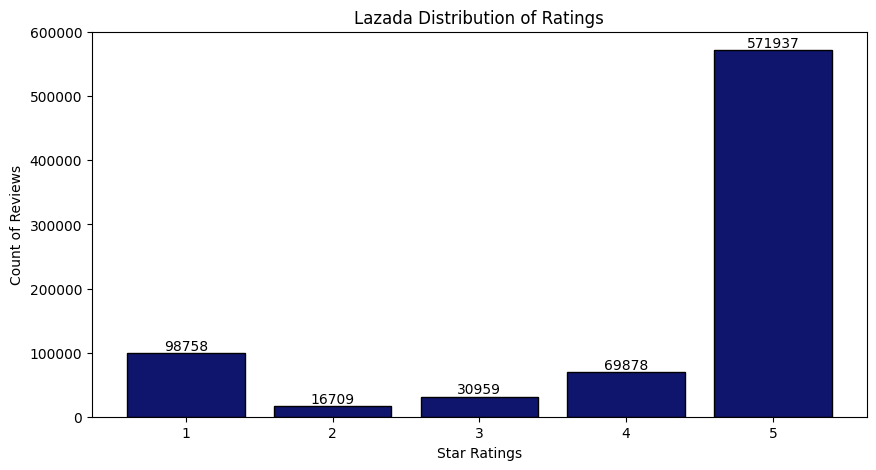

In [47]:
lazada_star_counts = lazada_reviews_df['score'].value_counts().sort_index()
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(lazada_star_counts.index, lazada_star_counts, color='#0f146d', edgecolor='black')
ax1.set_title('Lazada Distribution of Ratings')
ax1.set_xlabel('Star Ratings')
ax1.set_ylabel('Count of Reviews')
ax1.set_xticks(lazada_star_counts.index)
ax1.set_xticklabels(lazada_star_counts.index)

for i, count in enumerate(lazada_star_counts):
    ax1.text(lazada_star_counts.index[i], count, str(count), ha='center', va='bottom')

plt.show()

## Preprocessing

In [48]:
def laz_preprocessed_text(laz_raw_text):

  if not isinstance(laz_raw_text, str):     # Fixes float error if the input is not a string, just return an empty string
    return ''

  # Removes HTML Tags
  laz_rev_text = BeautifulSoup(laz_raw_text).get_text()

  # Removes non-letters/emojis, change to lowercase and then splitsit into tokens
  laz_words_only = re.sub("[^a-zA-Z]", " ", laz_rev_text)
  words = laz_words_only.lower().split()

  # Removing stopwords like the, in, of etc.
  laz_stop_words = set(stopwords.words('english'))
  laz_fil_words = [word for word in words if word not in laz_stop_words]

  return " ".join(laz_fil_words)

In [49]:
# Pre-process the raw text
lazada_reviews_df['contentAdj'] = lazada_reviews_df['content'].map(laz_preprocessed_text)

<ipython-input-48-2662b1879327>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  laz_rev_text = BeautifulSoup(laz_raw_text).get_text()


In [50]:
lazada_reviews_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,contentAdj
0,440d0532-50bc-47a2-8c57-5937919ecfd3,Cambronero,https://play-lh.googleusercontent.com/a/ACg8ocLySAr0FtHWhDqyJfZCmTdhDtiCmNxMqDOTwp4BF1xc=mo,ang ganda talaga dto,5,0,7.34.0,2023-09-29 05:04:49,Hello! Thank you for your positive feedback! We are pleased that you are satisfied with the app!,2023-09-29 06:20:39,7.34.0,ang ganda talaga dto
1,4ffc750f-e34f-41ed-a757-a9934761fd85,Sylvannah Garcia,https://play-lh.googleusercontent.com/a-/ALV-UjW4Xh7EcJUMpXAmE8IYclhwpb81GF8f8e7e_UF9-VX5AA,soo affordable and legit!,5,0,7.34.0,2023-09-29 04:38:35,"Hi, Sylvannah Garcia. Thank you for your review! We are glad to receive nice words from our users! We work to ensure that you get only a positive experience!",2023-09-29 05:33:39,7.34.0,soo affordable legit
2,0691670a-8713-470d-9557-644cae06c1e8,JoyRio Galnonez,https://play-lh.googleusercontent.com/a/ACg8ocK31E2I9Uqbhk_uco3MZMhzuWSQUyX7bhvBYPFeM3lcyQ=mo,"l ll,a ssso lollsols,,wswsz l ,olw,,s l ,lwloo a ssll lzl,oz,lloa zl,ls ,s w ,a.w, oloolllsoo ,l,olsl,,",1,0,7.34.0,2023-09-29 04:32:13,"Hi! We would like to report this review as off-topic, since its content doesn’t relate to the app core functionality and violates store review policy. Thank you in advance!",2023-09-29 05:20:04,7.34.0,l ssso lollsols wswsz l olw l lwloo ssll lzl oz lloa zl ls w w oloolllsoo l olsl
3,ee86c501-0dc0-4ad3-9b3a-2734b914481c,Clint andrew Fabon,https://play-lh.googleusercontent.com/a-/ALV-UjWBZ0C-HXsmUR_8a6ksIqG1CywwNx7bzjYtl-wxQ9XtFg,👍,5,0,NaN,2023-09-29 04:26:21,"Hi, Clint andrew Fabon, thanks for the stars!",2023-09-29 04:28:09,NaN,
4,8d9f287f-f79a-4a01-9e72-b08ec8b56089,prankrin rumuruza,https://play-lh.googleusercontent.com/a-/ALV-UjWo7mbTwJULZbTriSmWpZUq0b0LkYyXM1882Md0hEN0hw,i hope the installment must be 10k and up,4,0,7.34.0,2023-09-29 04:18:45,Thank you for your feedback on the issue you have encountered. Our team is currently working to improve the payment system for a faster and more reliable payment process. You can inquire about payment methods and issues by calling our customer service team. We look forward to serving you again.,2023-09-29 04:27:04,7.34.0,hope installment must k
...,...,...,...,...,...,...,...,...,...,...,...,...
788236,23ffe18d-c6af-4d40-b85e-d6c340827b79,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Good app ;),5,0,1.0,2013-06-10 02:35:53,NaN,NaT,1.0,good app
788237,934b24d3-6d54-47cf-b9bc-252355c9123f,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Thanks lazada for this app!!,5,0,1.0,2013-06-10 02:24:14,NaN,NaT,1.0,thanks lazada app
788238,d97c8554-a375-4f53-95b3-5ded486da09b,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Its a great way of shopping online. But please make us to choose to pay using debit card just like the web based lazada.,1,0,1.0,2013-06-09 10:19:39,NaN,NaT,1.0,great way shopping online please make us choose pay using debit card like web based lazada
788239,a80a7e3f-cb1c-499f-b5ff-bc7cc8fbd1a9,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,This is what I have been looking for. Now I can buy anything with my phone and products will be delivered to my door! That's so cool.,5,0,1.0,2013-06-09 09:29:25,NaN,NaT,1.0,looking buy anything phone products delivered door cool


In [51]:
pd.set_option('display.max_colwidth', None)
lazada_reviews_df[['content' , 'contentAdj']]

,content,contentAdj
0,ang ganda talaga dto,ang ganda talaga dto
1,soo affordable and legit!,soo affordable legit
2,"l ll,a ssso lollsols,,wswsz l ,olw,,s l ,lwloo a ssll lzl,oz,lloa zl,ls ,s w ,a.w, oloolllsoo ,l,olsl,,",l ssso lollsols wswsz l olw l lwloo ssll lzl oz lloa zl ls w w oloolllsoo l olsl
3,👍,
4,i hope the installment must be 10k and up,hope installment must k
...,...,...
788236,Good app ;),good app
788237,Thanks lazada for this app!!,thanks lazada app
788238,Its a great way of shopping online. But please make us to choose to pay using debit card just like the web based lazada.,great way shopping online please make us choose pay using debit card like web based lazada
788239,This is what I have been looking for. Now I can buy anything with my phone and products will be delivered to my door! That's so cool.,looking buy anything phone products delivered door cool


## Cleaning

In [52]:
# Find reviews with actual substance
lazada_reviews_df['content_clean'] = lazada_reviews_df['contentAdj'].str.split().map(len)

In [53]:
lazada_reviews_df[lazada_reviews_df['content_clean']==0].shape

(26727, 13)

In [54]:
#Removing emojis and other reviews
lazada_reviews_df[lazada_reviews_df['content_clean']==0]['content']

3                                                                               👍
22                                                                              👍
33                                                                       than you
49                                                                             👍🍻
80                                                                             ❤️
                                           ...                                   
788105                                                                        -_-
788129    สั่งซื้อไม่ได้ ขี้นพบปัญหา ให้กดดำเนินการตรวจสอบ แต่ก็ยังสั่งซื้อไม่ได้
788160                                                                          ♥
788204    แอพใช้ง่าย โหลดไวมากคับ สมแล้วที่เป็นเว็บช้อปปิ้งออนไลน์อันดับ 1 ของไทย
788227                                                                       :)))
Name: content, Length: 26727, dtype: object

In [55]:
# Drop these reviews that do not have any substance to it
lazada_reviews_df = lazada_reviews_df.drop(lazada_reviews_df[lazada_reviews_df['content_clean']==0].index)

In [56]:
# Reindex the dataframe
lazada_reviews_df.reset_index(drop=True, inplace=True)

In [57]:
lazada_reviews_df.shape

(761514, 13)

In [58]:
from langdetect import detect

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Create a boolean mask indicating which reviews are in English
english_mask_lazada = lazada_reviews_df['content'].apply(is_english)

# Filter the DataFrame to keep only English reviews
lazada_reviews_df = lazada_reviews_df[english_mask_lazada]

# Reset the index to ensure it is sequential and starts at 0
lazada_reviews_df.reset_index(drop=True, inplace=True)

# Create a mask for non-English content
non_english_mask_lazada = ~english_mask_lazada

# Use the mask to locate the indexes of non-English content
indexes_of_non_english_lazada = lazada_reviews_df[non_english_mask_lazada].index

# Access and view the non-English content using the indexes
non_english_content_lazada = lazada_reviews_df.loc[indexes_of_non_english_lazada, 'content']

<ipython-input-58-453d9d216620>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indexes_of_non_english_lazada = lazada_reviews_df[non_english_mask_lazada].index


In [59]:
lazada_reviews_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,contentAdj,content_clean
0,8d9f287f-f79a-4a01-9e72-b08ec8b56089,prankrin rumuruza,https://play-lh.googleusercontent.com/a-/ALV-UjWo7mbTwJULZbTriSmWpZUq0b0LkYyXM1882Md0hEN0hw,i hope the installment must be 10k and up,4,0,7.34.0,2023-09-29 04:18:45,Thank you for your feedback on the issue you have encountered. Our team is currently working to improve the payment system for a faster and more reliable payment process. You can inquire about payment methods and issues by calling our customer service team. We look forward to serving you again.,2023-09-29 04:27:04,7.34.0,hope installment must k,4
1,db117ea5-b513-4190-94d3-cf107b458e4b,Anna Victoria,https://play-lh.googleusercontent.com/a/ACg8ocJS1zulvNN_zLq-k383Iqv_Edhx9ZXzV2fJLANJdAVT=mo,"Very helpful, i don't need to go out",5,0,7.34.0,2023-09-29 04:13:56,"Hey, Anna Victoria, thanks for the awesome review! We're happy to hear we hit the mark for you, and we'll do our best to keep it up. Let us know if you need help with anything.",2023-09-29 04:18:23,7.34.0,helpful need go,3
2,487438ef-565b-45df-b798-f2e3119a37e3,Alibai Buton,https://play-lh.googleusercontent.com/a/ACg8ocJeVIPA0A3tOINL3HaWXgOKrDHbteL48-PuIrdYhA5N=mo,thankyou,5,0,7.34.0,2023-09-29 04:00:39,"Hey, Alibai Buton. Thanks so much for a positive review, we hope you're having fun in the app! Let us know if you need anything.",2023-09-29 04:18:45,7.34.0,thankyou,1
3,806f6826-a6a5-4bf4-8174-7423469bf385,Lim Jia Shen,https://play-lh.googleusercontent.com/a-/ALV-UjX5XvQ7ZmRKjQ8wMljUHsGpF26V8k9wRFmJV2mGzl6KIw,"Good , online shopping is easier and more convenient to visit the retail to buy products",5,0,7.34.0,2023-09-29 03:52:04,"Hey, Lim Jia Shen, thanks for the awesome review! We're happy to hear we hit the mark for you, and we'll do our best to keep it up. Let us know if you need help with anything.",2023-09-29 04:19:03,7.34.0,good online shopping easier convenient visit retail buy products,9
4,f9fab8d4-c0a4-4ba7-b611-fe88467acba1,nathaniel castillo,https://play-lh.googleusercontent.com/a-/ALV-UjW96LtNh24B-hX626UGlgIBynO8hsOclwdp7L_Kr-VsPGu1,stop changing the app name,3,0,7.35.0,2023-09-29 03:00:28,Thank you for your feedback. Your concern has been duly noted. We are doing our best to rectify the issue and improve your shopping experience. We thank you for your feedback. Feedback is a gift and it goes a long way in helping Lazada serve you better.,2023-09-29 06:27:50,7.35.0,stop changing app name,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336197,23ffe18d-c6af-4d40-b85e-d6c340827b79,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Good app ;),5,0,1.0,2013-06-10 02:35:53,NaN,NaT,1.0,good app,2
336198,934b24d3-6d54-47cf-b9bc-252355c9123f,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Thanks lazada for this app!!,5,0,1.0,2013-06-10 02:24:14,NaN,NaT,1.0,thanks lazada app,3
336199,d97c8554-a375-4f53-95b3-5ded486da09b,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Its a great way of shopping online. But please make us to choose to pay using debit card just like the web based lazada.,1,0,1.0,2013-06-09 10:19:39,NaN,NaT,1.0,great way shopping online please make us choose pay using debit card like web based lazada,16
336200,a80a7e3f-cb1c-499f-b5ff-bc7cc8fbd1a9,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,This is what I have been looking for. Now I can buy anything with my phone and products will be delivered to my door! That's so cool.,5,0,1.0,2013-06-09 09:29:25,NaN,NaT,1.0,looking buy anything phone products delivered door cool,8


In [88]:
# Dropping content_clean column and then rearranging the columns to move contentAdj next to content
lazada_reviews_df.drop('content_clean', axis=1, inplace=True)
lazada_reviews_df = lazada_reviews_df[['reviewId', 'userName', 'userImage', 'content', 'contentAdj', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion']]

In [89]:
lazada_reviews_df

,reviewId,userName,userImage,content,contentAdj,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8d9f287f-f79a-4a01-9e72-b08ec8b56089,prankrin rumuruza,https://play-lh.googleusercontent.com/a-/ALV-UjWo7mbTwJULZbTriSmWpZUq0b0LkYyXM1882Md0hEN0hw,i hope the installment must be 10k and up,hope installment must k,4,0,7.34.0,2023-09-29 04:18:45,Thank you for your feedback on the issue you have encountered. Our team is currently working to improve the payment system for a faster and more reliable payment process. You can inquire about payment methods and issues by calling our customer service team. We look forward to serving you again.,2023-09-29 04:27:04,7.34.0
1,db117ea5-b513-4190-94d3-cf107b458e4b,Anna Victoria,https://play-lh.googleusercontent.com/a/ACg8ocJS1zulvNN_zLq-k383Iqv_Edhx9ZXzV2fJLANJdAVT=mo,"Very helpful, i don't need to go out",helpful need go,5,0,7.34.0,2023-09-29 04:13:56,"Hey, Anna Victoria, thanks for the awesome review! We're happy to hear we hit the mark for you, and we'll do our best to keep it up. Let us know if you need help with anything.",2023-09-29 04:18:23,7.34.0
2,487438ef-565b-45df-b798-f2e3119a37e3,Alibai Buton,https://play-lh.googleusercontent.com/a/ACg8ocJeVIPA0A3tOINL3HaWXgOKrDHbteL48-PuIrdYhA5N=mo,thankyou,thankyou,5,0,7.34.0,2023-09-29 04:00:39,"Hey, Alibai Buton. Thanks so much for a positive review, we hope you're having fun in the app! Let us know if you need anything.",2023-09-29 04:18:45,7.34.0
3,806f6826-a6a5-4bf4-8174-7423469bf385,Lim Jia Shen,https://play-lh.googleusercontent.com/a-/ALV-UjX5XvQ7ZmRKjQ8wMljUHsGpF26V8k9wRFmJV2mGzl6KIw,"Good , online shopping is easier and more convenient to visit the retail to buy products",good online shopping easier convenient visit retail buy products,5,0,7.34.0,2023-09-29 03:52:04,"Hey, Lim Jia Shen, thanks for the awesome review! We're happy to hear we hit the mark for you, and we'll do our best to keep it up. Let us know if you need help with anything.",2023-09-29 04:19:03,7.34.0
4,f9fab8d4-c0a4-4ba7-b611-fe88467acba1,nathaniel castillo,https://play-lh.googleusercontent.com/a-/ALV-UjW96LtNh24B-hX626UGlgIBynO8hsOclwdp7L_Kr-VsPGu1,stop changing the app name,stop changing app name,3,0,7.35.0,2023-09-29 03:00:28,Thank you for your feedback. Your concern has been duly noted. We are doing our best to rectify the issue and improve your shopping experience. We thank you for your feedback. Feedback is a gift and it goes a long way in helping Lazada serve you better.,2023-09-29 06:27:50,7.35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
336197,23ffe18d-c6af-4d40-b85e-d6c340827b79,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Good app ;),good app,5,0,1.0,2013-06-10 02:35:53,NaN,NaT,1.0
336198,934b24d3-6d54-47cf-b9bc-252355c9123f,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Thanks lazada for this app!!,thanks lazada app,5,0,1.0,2013-06-10 02:24:14,NaN,NaT,1.0
336199,d97c8554-a375-4f53-95b3-5ded486da09b,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Its a great way of shopping online. But please make us to choose to pay using debit card just like the web based lazada.,great way shopping online please make us choose pay using debit card like web based lazada,1,0,1.0,2013-06-09 10:19:39,NaN,NaT,1.0
336200,a80a7e3f-cb1c-499f-b5ff-bc7cc8fbd1a9,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,This is what I have been looking for. Now I can buy anything with my phone and products will be delivered to my door! That's so cool.,looking buy anything phone products delivered door cool,5,0,1.0,2013-06-09 09:29:25,NaN,NaT,1.0


In [90]:
lazada_reviews_df.to_csv('lazada_reviews_clean.csv', index=False) #Save the data

### Shopee

In [91]:
shopee_reviews_df = pd.read_csv('shopee_reviews.csv', parse_dates = ['at', 'repliedAt'])

In [92]:
shopee_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,845b4685-3d08-43df-8dc6-2aa941c4c6db,Bien Lusterio,https://play-lh.googleusercontent.com/a-/ALV-UjVzM8wtJfnQshwl4BlKC5Seiouk5WBqLsIZQcIdsbVqAg,Adds ng adds,1,0,NaN,2023-09-29 05:58:57,NaN,NaT,NaN
1,507c3cfa-5a6d-4e6e-878d-822462bf2fce,Jeariel Banzuela,https://play-lh.googleusercontent.com/a-/ALV-UjUpMNyv020ay71oHEbD4K29rckdsMIIeYdMU_GMdQgG,Pls give more discount and make more Free delivery,1,0,NaN,2023-09-29 05:58:25,NaN,NaT,NaN
2,a16ecaf9-152b-4b8d-bb32-610b54b8c0ab,louie recto,https://play-lh.googleusercontent.com/a/ACg8ocIWSlCRGoaUu3h2A_gjg2mU-xtrl7yISDSkg71D3wtZ=mo,Amazing,5,0,3.09.11,2023-09-29 05:52:21,NaN,NaT,3.09.11
3,93dda26c-d7e3-4ef9-ad57-61a76ce40efd,Vanessa Gano,https://play-lh.googleusercontent.com/a/ACg8ocL3xNHhNdOsDHBTECSlqHZoNLhILLDeRRmc4zNxQTAb=mo,Amazing online shop....,5,0,3.09.11,2023-09-29 05:50:45,NaN,NaT,3.09.11
4,adb1c512-7fe6-4e88-a3a7-e984a64e20a3,lyn Vhera,https://play-lh.googleusercontent.com/a/ACg8ocJmVT8beTlRREOdYn_KDoiVbwgf98hx_Y0Mu6MkqTA6=mo,"I want to report that the shopping cart is lagging and hard to navigate or click. The selection, delete, done, edit & etc button is hard to click. I don't know if it is loading to long or the app is crashing already.",3,0,NaN,2023-09-29 05:49:45,NaN,NaT,NaN


In [93]:
shopee_reviews_df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
316405,1d8a6e21-bccd-4e77-983d-3eb7a4bf5d59,Nilo Gonzales Jr.,https://play-lh.googleusercontent.com/a/ACg8ocJChSSMNFTuNXyYRtlPruHmdZoy9U4aue7dJ0eJu4q4=mo,Great app..,5,0,2.72.11,2021-06-15 09:15:04,"We are truly happy to know that you're having an enjoyable shopping experience with us. We promise to continue and improve our services for you. Let us know if you have any questions. We read and reply to every message, so please feel free to reach us anytime. Thank you! 😊\n",2021-06-15 10:23:31,2.72.11
316406,5660b115-ded6-4b49-834c-861395ad042e,Monica Neri,https://play-lh.googleusercontent.com/a/ACg8ocKDBaQJMtKs97ksEo4t33zmD-7V32-oHRPnE9eCiFCu=mo,Awesome 🥰🥰,5,0,NaN,2021-06-15 09:14:33,"We are truly happy to know that you're having an enjoyable shopping experience with us. We promise to continue and improve our services for you. Let us know if you have any questions. We read and reply to every message, so please feel free to reach us anytime. Thank you! 😊\n",2021-06-15 10:23:36,NaN
316407,8c888973-485e-4683-9348-e6c767baa641,Zian Vinzent,https://play-lh.googleusercontent.com/a-/ALV-UjUHVsrunCpwtrELWWRNAc-iSTkvGfhcIwkyAFbOeVA-wFU,Nice one d na kailangan lumabas para bumili andito na lahat sa shopee,5,0,2.72.11,2021-06-15 09:12:53,"We are truly happy to know that you're having an enjoyable shopping experience with us. We promise to continue and improve our services for you. Let us know if you have any questions. We read and reply to every message, so please feel free to reach us anytime. Thank you! 😊",2021-06-15 10:17:12,2.72.11
316408,79586726-0db5-49f9-9d07-e440382ed22b,Jeneluz Canasta,https://play-lh.googleusercontent.com/a/ACg8ocKTlsS5Fc22_uG2rRRt6MCfArf5eX5kAld8cA4pGP_H=mo,Awesome,5,0,2.71.21,2021-06-15 09:12:39,"We are truly happy to know that you're having an enjoyable shopping experience with us. We promise to continue and improve our services for you. Let us know if you have any questions. We read and reply to every message, so please feel free to reach us anytime. Thank you! 😊",2021-06-15 10:16:50,2.71.21
316409,debf7cbb-2a8a-422b-ad9f-726606a78f92,Kobe Pami,https://play-lh.googleusercontent.com/a/ACg8ocIUdzEnqEOu9cf4ULKlqk_PaHy5F9Ye7wyJH3Tcz94Q=mo,msrap at njoy.. lalo kpag mrami k pera nkaka adik mamili po..,5,0,2.69.20,2021-06-15 09:11:49,"We are truly happy to know that you're having an enjoyable shopping experience with us. We promise to continue and improve our services for you. Let us know if you have any questions. We read and reply to every message, so please feel free to reach us anytime. Thank you! 😊\n",2021-06-15 10:27:47,2.69.20


In [94]:
shopee_reviews_df.shape

(316410, 11)

In [95]:
shopee_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316410 entries, 0 to 316409
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              316410 non-null  object        
 1   userName              316410 non-null  object        
 2   userImage             316410 non-null  object        
 3   content               316395 non-null  object        
 4   score                 316410 non-null  int64         
 5   thumbsUpCount         316410 non-null  int64         
 6   reviewCreatedVersion  245607 non-null  object        
 7   at                    316410 non-null  datetime64[ns]
 8   replyContent          149161 non-null  object        
 9   repliedAt             149164 non-null  datetime64[ns]
 10  appVersion            245607 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 26.6+ MB


In [96]:
shopee_reviews_df.isnull().sum()

reviewId                     0
userName                     0
userImage                    0
content                     15
score                        0
thumbsUpCount                0
reviewCreatedVersion     70803
at                           0
replyContent            167249
repliedAt               167246
appVersion               70803
dtype: int64

In [97]:
shopee_reviews_df.describe()

,score,thumbsUpCount
count,316410.000000,316410.000000
mean,4.032006,1.377308
std,1.597503,61.693268
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,19734.000000


## Removing Duplicates

In [98]:
shopee_reviews_df[shopee_reviews_df.duplicated(['userName', 'content', 'at'])].shape

(0, 11)

In [99]:
shopee_reviews_df.drop_duplicates(['userName', 'content', 'at'], inplace=True)

In [100]:
shopee_reviews_df.reset_index(drop=True, inplace=True)

In [101]:
shopee_reviews_df.shape

(316410, 11)

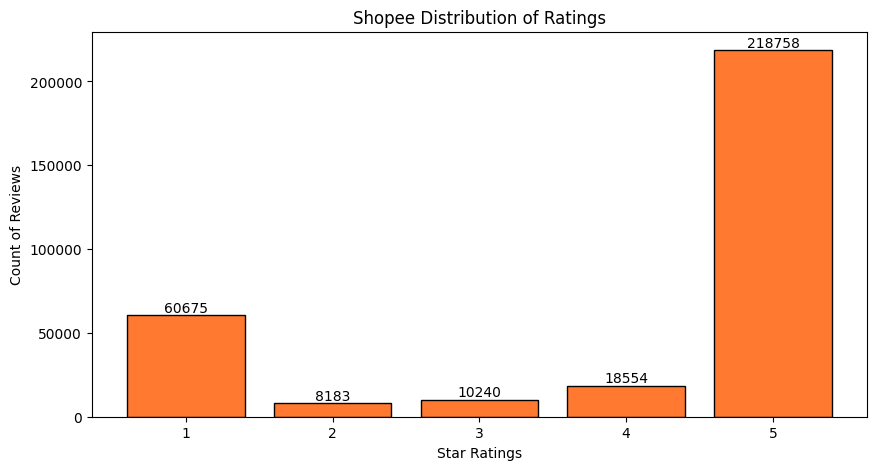

In [102]:
shopee_star_counts = shopee_reviews_df['score'].value_counts().sort_index()
fig, ax2 = plt.subplots(figsize=(10, 5))

ax2.bar(shopee_star_counts.index, shopee_star_counts, color='#ff7930', edgecolor='black')
ax2.set_title('Shopee Distribution of Ratings')
ax2.set_xlabel('Star Ratings')
ax2.set_ylabel('Count of Reviews')
ax2.set_xticks(shopee_star_counts.index)
ax2.set_xticklabels(shopee_star_counts.index)

for i, count in enumerate(shopee_star_counts):
    ax2.text(shopee_star_counts.index[i], count, str(count), ha='center', va='bottom')

plt.show()

## Preprocessing

In [103]:
def shop_preprocessed_text(shop_raw_text):

  if not isinstance(shop_raw_text, str):     # Fixes float error if the input is not a string, just return an empty string
    return ''

  # Removes HTML Tags
  shop_rev_text = BeautifulSoup(shop_raw_text).get_text()

  # Removes non-letters/emojis, change to lowercase and then splitsit into tokens
  shop_words_only = re.sub("[^a-zA-Z]", " ", shop_rev_text)
  words = shop_words_only.lower().split()

  # Removing stopwords like the, in, of etc.
  shop_stop_words = set(stopwords.words('english'))
  shop_fil_words = [word for word in words if word not in shop_stop_words]

  return " ".join(shop_fil_words)

In [104]:
# Pre-process the raw text
shopee_reviews_df['contentAdj'] = shopee_reviews_df['content'].map(shop_preprocessed_text)

<ipython-input-103-a4cab84c0b0f>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  shop_rev_text = BeautifulSoup(shop_raw_text).get_text()


In [105]:
shopee_reviews_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,contentAdj
0,845b4685-3d08-43df-8dc6-2aa941c4c6db,Bien Lusterio,https://play-lh.googleusercontent.com/a-/ALV-UjVzM8wtJfnQshwl4BlKC5Seiouk5WBqLsIZQcIdsbVqAg,Adds ng adds,1,0,NaN,2023-09-29 05:58:57,NaN,NaT,NaN,adds ng adds
1,507c3cfa-5a6d-4e6e-878d-822462bf2fce,Jeariel Banzuela,https://play-lh.googleusercontent.com/a-/ALV-UjUpMNyv020ay71oHEbD4K29rckdsMIIeYdMU_GMdQgG,Pls give more discount and make more Free delivery,1,0,NaN,2023-09-29 05:58:25,NaN,NaT,NaN,pls give discount make free delivery
2,a16ecaf9-152b-4b8d-bb32-610b54b8c0ab,louie recto,https://play-lh.googleusercontent.com/a/ACg8ocIWSlCRGoaUu3h2A_gjg2mU-xtrl7yISDSkg71D3wtZ=mo,Amazing,5,0,3.09.11,2023-09-29 05:52:21,NaN,NaT,3.09.11,amazing
3,93dda26c-d7e3-4ef9-ad57-61a76ce40efd,Vanessa Gano,https://play-lh.googleusercontent.com/a/ACg8ocL3xNHhNdOsDHBTECSlqHZoNLhILLDeRRmc4zNxQTAb=mo,Amazing online shop....,5,0,3.09.11,2023-09-29 05:50:45,NaN,NaT,3.09.11,amazing online shop
4,adb1c512-7fe6-4e88-a3a7-e984a64e20a3,lyn Vhera,https://play-lh.googleusercontent.com/a/ACg8ocJmVT8beTlRREOdYn_KDoiVbwgf98hx_Y0Mu6MkqTA6=mo,"I want to report that the shopping cart is lagging and hard to navigate or click. The selection, delete, done, edit & etc button is hard to click. I don't know if it is loading to long or the app is crashing already.",3,0,NaN,2023-09-29 05:49:45,NaN,NaT,NaN,want report shopping cart lagging hard navigate click selection delete done edit etc button hard click know loading long app crashing already
...,...,...,...,...,...,...,...,...,...,...,...,...
316405,1d8a6e21-bccd-4e77-983d-3eb7a4bf5d59,Nilo Gonzales Jr.,https://play-lh.googleusercontent.com/a/ACg8ocJChSSMNFTuNXyYRtlPruHmdZoy9U4aue7dJ0eJu4q4=mo,Great app..,5,0,2.72.11,2021-06-15 09:15:04,"We are truly happy to know that you're having an enjoyable shopping experience with us. We promise to continue and improve our services for you. Let us know if you have any questions. We read and reply to every message, so please feel free to reach us anytime. Thank you! 😊\n",2021-06-15 10:23:31,2.72.11,great app
316406,5660b115-ded6-4b49-834c-861395ad042e,Monica Neri,https://play-lh.googleusercontent.com/a/ACg8ocKDBaQJMtKs97ksEo4t33zmD-7V32-oHRPnE9eCiFCu=mo,Awesome 🥰🥰,5,0,NaN,2021-06-15 09:14:33,"We are truly happy to know that you're having an enjoyable shopping experience with us. We promise to continue and improve our services for you. Let us know if you have any questions. We read and reply to every message, so please feel free to reach us anytime. Thank you! 😊\n",2021-06-15 10:23:36,NaN,awesome
316407,8c888973-485e-4683-9348-e6c767baa641,Zian Vinzent,https://play-lh.googleusercontent.com/a-/ALV-UjUHVsrunCpwtrELWWRNAc-iSTkvGfhcIwkyAFbOeVA-wFU,Nice one d na kailangan lumabas para bumili andito na lahat sa shopee,5,0,2.72.11,2021-06-15 09:12:53,"We are truly happy to know that you're having an enjoyable shopping experience with us. We promise to continue and improve our services for you. Let us know if you have any questions. We read and reply to every message, so please feel free to reach us anytime. Thank you! 😊",2021-06-15 10:17:12,2.72.11,nice one na kailangan lumabas para bumili andito na lahat sa shopee
316408,79586726-0db5-49f9-9d07-e440382ed22b,Jeneluz Canasta,https://play-lh.googleusercontent.com/a/ACg8ocKTlsS5Fc22_uG2rRRt6MCfArf5eX5kAld8cA4pGP_H=mo,Awesome,5,0,2.71.21,2021-06-15 09:12:39,"We are truly happy to know that you're having an enjoyable shopping experience with us. We promise to continue and improve our services for you. Let us know if you have any questions. We read and reply to every message, so please feel free to reach us anytime. Thank you! 😊",2021-06-15 10:16:50,2.71.21,awesome


In [106]:
pd.set_option('display.max_colwidth', None)
shopee_reviews_df[['content' , 'contentAdj']]

,content,contentAdj
0,Adds ng adds,adds ng adds
1,Pls give more discount and make more Free delivery,pls give discount make free delivery
2,Amazing,amazing
3,Amazing online shop....,amazing online shop
4,"I want to report that the shopping cart is lagging and hard to navigate or click. The selection, delete, done, edit & etc button is hard to click. I don't know if it is loading to long or the app is crashing already.",want report shopping cart lagging hard navigate click selection delete done edit etc button hard click know loading long app crashing already
...,...,...
316405,Great app..,great app
316406,Awesome 🥰🥰,awesome
316407,Nice one d na kailangan lumabas para bumili andito na lahat sa shopee,nice one na kailangan lumabas para bumili andito na lahat sa shopee
316408,Awesome,awesome


## Cleaning

In [107]:
# Find reviews with actual substance
shopee_reviews_df['content_clean'] = shopee_reviews_df['contentAdj'].str.split().map(len)

In [108]:
shopee_reviews_df[shopee_reviews_df['content_clean']==0].shape

(11560, 13)

In [109]:
#Removing emojis and other reviews
shopee_reviews_df[shopee_reviews_df['content_clean']==0]['content']

16             👏👏❤❤
60               Re
77                😊
88                😊
152              ❤️
            ...    
316302          😍😍😍
316325    👍👍👍👍👍👍👍👍👍
316357         🥰🥰🥰🥰
316366            ❤
316404    👎👎👎👎👎👎👎👎👎
Name: content, Length: 11560, dtype: object

In [110]:
# Drop these reviews that do not have any substance to it
shopee_reviews_df = shopee_reviews_df.drop(shopee_reviews_df[shopee_reviews_df['content_clean']==0].index)

In [111]:
# Reindex the dataframe
shopee_reviews_df.reset_index(drop=True, inplace=True)

In [112]:
shopee_reviews_df.shape

(304850, 13)

In [113]:
from langdetect import detect

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Create a boolean mask indicating which reviews are in English
english_mask_shopee = shopee_reviews_df['content'].apply(is_english)

# Filter the DataFrame to keep only English reviews
shopee_reviews_df = shopee_reviews_df[english_mask_shopee]

# Reset the index to ensure it is sequential and starts at 0
shopee_reviews_df.reset_index(drop=True, inplace=True)

# Create a mask for non-English content
non_english_mask_shopee = ~english_mask_shopee

# Use the mask to locate the indexes of non-English content
indexes_of_non_english_shopee = shopee_reviews_df[non_english_mask_shopee].index

# Access and view the non-English content using the indexes
non_english_content_shopee = shopee_reviews_df.loc[indexes_of_non_english_shopee, 'content']

<ipython-input-113-739be40f7b5d>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indexes_of_non_english_shopee = shopee_reviews_df[non_english_mask_shopee].index


In [114]:
shopee_reviews_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,contentAdj,content_clean
0,507c3cfa-5a6d-4e6e-878d-822462bf2fce,Jeariel Banzuela,https://play-lh.googleusercontent.com/a-/ALV-UjUpMNyv020ay71oHEbD4K29rckdsMIIeYdMU_GMdQgG,Pls give more discount and make more Free delivery,1,0,NaN,2023-09-29 05:58:25,NaN,NaT,NaN,pls give discount make free delivery,6
1,93dda26c-d7e3-4ef9-ad57-61a76ce40efd,Vanessa Gano,https://play-lh.googleusercontent.com/a/ACg8ocL3xNHhNdOsDHBTECSlqHZoNLhILLDeRRmc4zNxQTAb=mo,Amazing online shop....,5,0,3.09.11,2023-09-29 05:50:45,NaN,NaT,3.09.11,amazing online shop,3
2,adb1c512-7fe6-4e88-a3a7-e984a64e20a3,lyn Vhera,https://play-lh.googleusercontent.com/a/ACg8ocJmVT8beTlRREOdYn_KDoiVbwgf98hx_Y0Mu6MkqTA6=mo,"I want to report that the shopping cart is lagging and hard to navigate or click. The selection, delete, done, edit & etc button is hard to click. I don't know if it is loading to long or the app is crashing already.",3,0,NaN,2023-09-29 05:49:45,NaN,NaT,NaN,want report shopping cart lagging hard navigate click selection delete done edit etc button hard click know loading long app crashing already,22
3,c796a2b4-6e7a-4fcf-a058-2d4a2335fbce,jean abad,https://play-lh.googleusercontent.com/a/ACg8ocLrwH9e_z-6XqJsU309-BosvXnurqJkh9-Hro931quP=mo,"Secured shopping,, 😁👌",5,0,3.09.11,2023-09-29 05:46:12,NaN,NaT,3.09.11,secured shopping,2
4,5a5bee87-c15d-4621-a9c4-295c6102e02b,Galaxy Stream,https://play-lh.googleusercontent.com/a-/ALV-UjWOvddhwl0i4W-T88_fQf4Sjb-PDQkM08l-cZX7baK3,Fix your scams. Create a tight proof system.,1,0,3.09.11,2023-09-29 05:02:09,NaN,NaT,3.09.11,fix scams create tight proof system,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155578,90fb80b2-24fb-4f01-a178-2bb287fbb9b5,jelanndrei lopez,https://play-lh.googleusercontent.com/a-/ALV-UjXUSfqBej25VKWRfPDyQQeTMe7y5CxVaRx0oZ8i7jAVFbg,"I hate it, log yarn",1,0,2.72.14,2021-06-15 09:28:49,NaN,NaT,2.72.14,hate log yarn,3
155579,d20ab36d-f9e5-4433-b10d-4bbf533ac7a7,Leo Suico,https://play-lh.googleusercontent.com/a/ACg8ocI2HTMxSr6K8ArRn5CXP_lyBSfJ9RCBDJ-9AhCfzmA-=mo,very accomodating👍thank you hoping to order again with you soon..,5,0,2.71.21,2021-06-15 09:27:13,"We are truly happy to know that you're having an enjoyable shopping experience with us. We promise to continue and improve our services for you. Let us know if you have any questions. We read and reply to every message, so please feel free to reach us anytime. Thank you! 😊",2021-06-15 06:37:05,2.71.21,accomodating thank hoping order soon,5
155580,5ba2cac2-9427-4ac3-9074-38c53116d513,lalene dominado,https://play-lh.googleusercontent.com/a-/ALV-UjWf-HkiI3of2QDArRK5rtyutSScUtXZ3gXZVEm2ixe8rWE,Good quality and service's,5,0,2.71.15,2021-06-15 09:24:05,NaN,NaT,2.71.15,good quality service,3
155581,3b4745b0-2fab-4153-8f3d-16b91bb8d6b9,Joel Siarez jr,https://play-lh.googleusercontent.com/a/ACg8ocKQ51AlOILYwqJSEbHxQb02IYoYJpyq3AHB9A3AKrts=mo,"I love shoppe, becuase its so many items can i bay",3,0,2.72.11,2021-06-15 09:23:16,NaN,NaT,2.72.11,love shoppe becuase many items bay,6


In [115]:
# Dropping content_clean column and then rearranging the columns to move contentAdj next to content
shopee_reviews_df.drop('content_clean', axis=1, inplace=True)
shopee_reviews_df = shopee_reviews_df[['reviewId', 'userName', 'userImage', 'content', 'contentAdj', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion']]

In [116]:
shopee_reviews_df

,reviewId,userName,userImage,content,contentAdj,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,507c3cfa-5a6d-4e6e-878d-822462bf2fce,Jeariel Banzuela,https://play-lh.googleusercontent.com/a-/ALV-UjUpMNyv020ay71oHEbD4K29rckdsMIIeYdMU_GMdQgG,Pls give more discount and make more Free delivery,pls give discount make free delivery,1,0,NaN,2023-09-29 05:58:25,NaN,NaT,NaN
1,93dda26c-d7e3-4ef9-ad57-61a76ce40efd,Vanessa Gano,https://play-lh.googleusercontent.com/a/ACg8ocL3xNHhNdOsDHBTECSlqHZoNLhILLDeRRmc4zNxQTAb=mo,Amazing online shop....,amazing online shop,5,0,3.09.11,2023-09-29 05:50:45,NaN,NaT,3.09.11
2,adb1c512-7fe6-4e88-a3a7-e984a64e20a3,lyn Vhera,https://play-lh.googleusercontent.com/a/ACg8ocJmVT8beTlRREOdYn_KDoiVbwgf98hx_Y0Mu6MkqTA6=mo,"I want to report that the shopping cart is lagging and hard to navigate or click. The selection, delete, done, edit & etc button is hard to click. I don't know if it is loading to long or the app is crashing already.",want report shopping cart lagging hard navigate click selection delete done edit etc button hard click know loading long app crashing already,3,0,NaN,2023-09-29 05:49:45,NaN,NaT,NaN
3,c796a2b4-6e7a-4fcf-a058-2d4a2335fbce,jean abad,https://play-lh.googleusercontent.com/a/ACg8ocLrwH9e_z-6XqJsU309-BosvXnurqJkh9-Hro931quP=mo,"Secured shopping,, 😁👌",secured shopping,5,0,3.09.11,2023-09-29 05:46:12,NaN,NaT,3.09.11
4,5a5bee87-c15d-4621-a9c4-295c6102e02b,Galaxy Stream,https://play-lh.googleusercontent.com/a-/ALV-UjWOvddhwl0i4W-T88_fQf4Sjb-PDQkM08l-cZX7baK3,Fix your scams. Create a tight proof system.,fix scams create tight proof system,1,0,3.09.11,2023-09-29 05:02:09,NaN,NaT,3.09.11
...,...,...,...,...,...,...,...,...,...,...,...,...
155578,90fb80b2-24fb-4f01-a178-2bb287fbb9b5,jelanndrei lopez,https://play-lh.googleusercontent.com/a-/ALV-UjXUSfqBej25VKWRfPDyQQeTMe7y5CxVaRx0oZ8i7jAVFbg,"I hate it, log yarn",hate log yarn,1,0,2.72.14,2021-06-15 09:28:49,NaN,NaT,2.72.14
155579,d20ab36d-f9e5-4433-b10d-4bbf533ac7a7,Leo Suico,https://play-lh.googleusercontent.com/a/ACg8ocI2HTMxSr6K8ArRn5CXP_lyBSfJ9RCBDJ-9AhCfzmA-=mo,very accomodating👍thank you hoping to order again with you soon..,accomodating thank hoping order soon,5,0,2.71.21,2021-06-15 09:27:13,"We are truly happy to know that you're having an enjoyable shopping experience with us. We promise to continue and improve our services for you. Let us know if you have any questions. We read and reply to every message, so please feel free to reach us anytime. Thank you! 😊",2021-06-15 06:37:05,2.71.21
155580,5ba2cac2-9427-4ac3-9074-38c53116d513,lalene dominado,https://play-lh.googleusercontent.com/a-/ALV-UjWf-HkiI3of2QDArRK5rtyutSScUtXZ3gXZVEm2ixe8rWE,Good quality and service's,good quality service,5,0,2.71.15,2021-06-15 09:24:05,NaN,NaT,2.71.15
155581,3b4745b0-2fab-4153-8f3d-16b91bb8d6b9,Joel Siarez jr,https://play-lh.googleusercontent.com/a/ACg8ocKQ51AlOILYwqJSEbHxQb02IYoYJpyq3AHB9A3AKrts=mo,"I love shoppe, becuase its so many items can i bay",love shoppe becuase many items bay,3,0,2.72.11,2021-06-15 09:23:16,NaN,NaT,2.72.11


In [117]:
shopee_reviews_df.to_csv('shopee_reviews_clean.csv', index=False)     #Save the data